In [37]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = pd.read_csv("datasets/titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

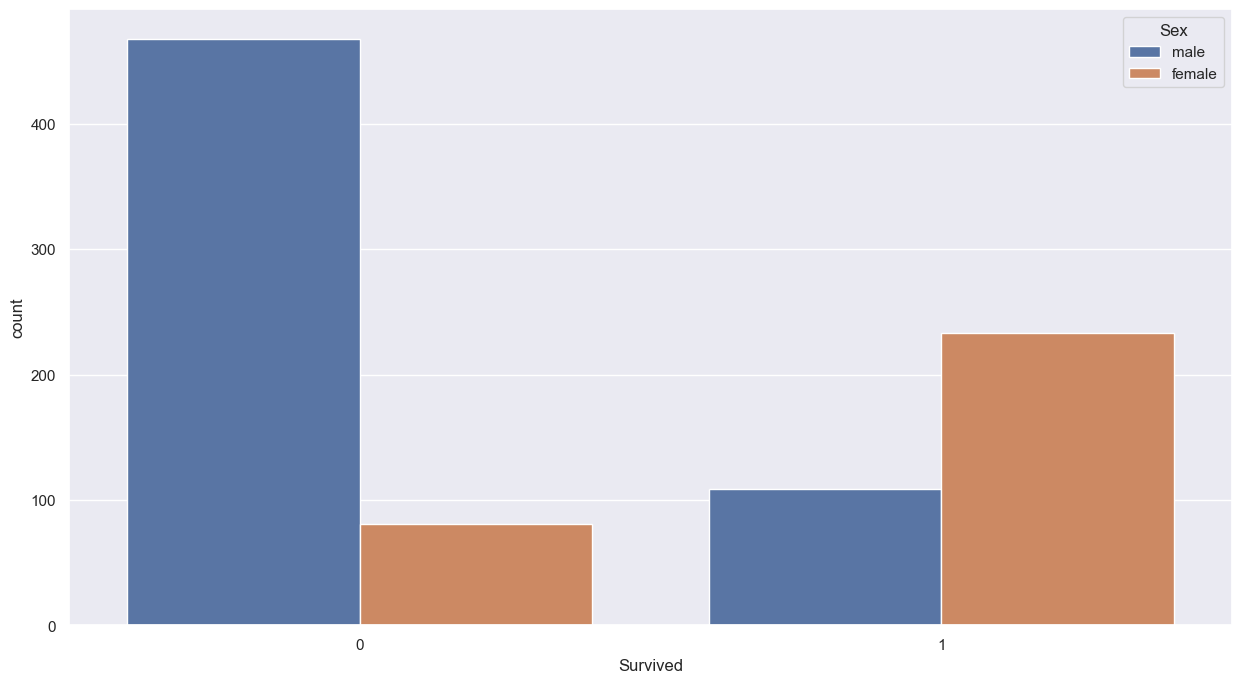

In [39]:
sb.countplot(x="Survived", data=data, hue="Sex")


In [40]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

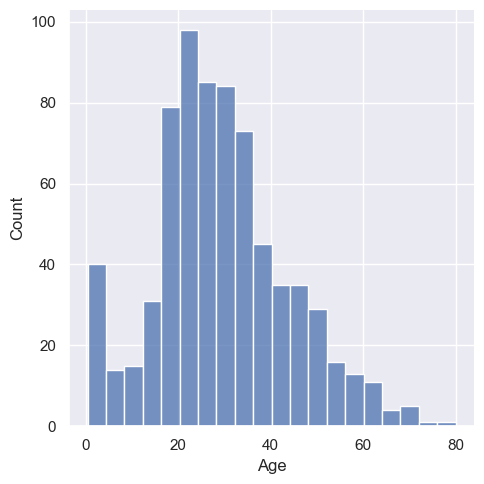

In [41]:
sb.displot(x='Age', data=data)


In [42]:
# Fill the empty age data with the mean
data["Age"] = data["Age"].fillna(data["Age"].mean())

# Remove the cabin column
data = data.drop(columns=["Cabin"], axis=1)

data = data.dropna()

data = data.drop(columns=["Name", "PassengerId", "Ticket"], axis=1)

# Dummies
dummies_gender = pd.get_dummies(data["Sex"], dtype=int, drop_first=True)
data = data.join(dummies_gender)
data = data.drop(columns=["Sex"], axis=1)


<Axes: >

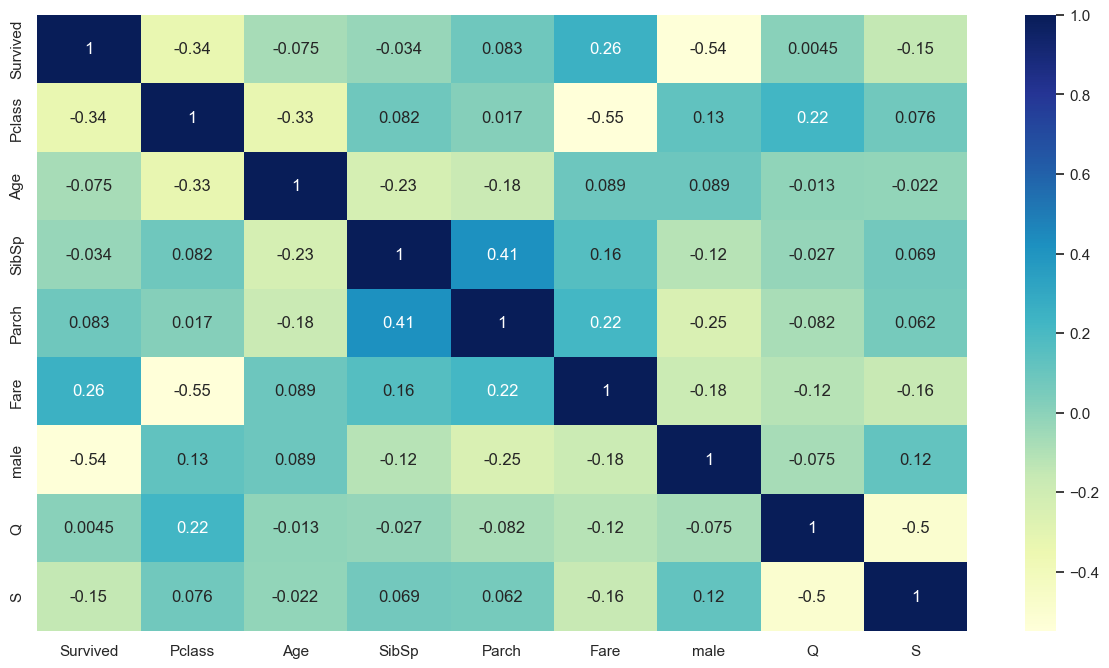

In [43]:
dummies_embarked = pd.get_dummies(data["Embarked"], dtype=int, drop_first=True)
data = data.join(dummies_embarked)
data = data.drop(columns=["Embarked"], axis=1)

data.head()

sb.set(rc={"figure.figsize": (15, 8)})
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='Survived', ylabel='count'>

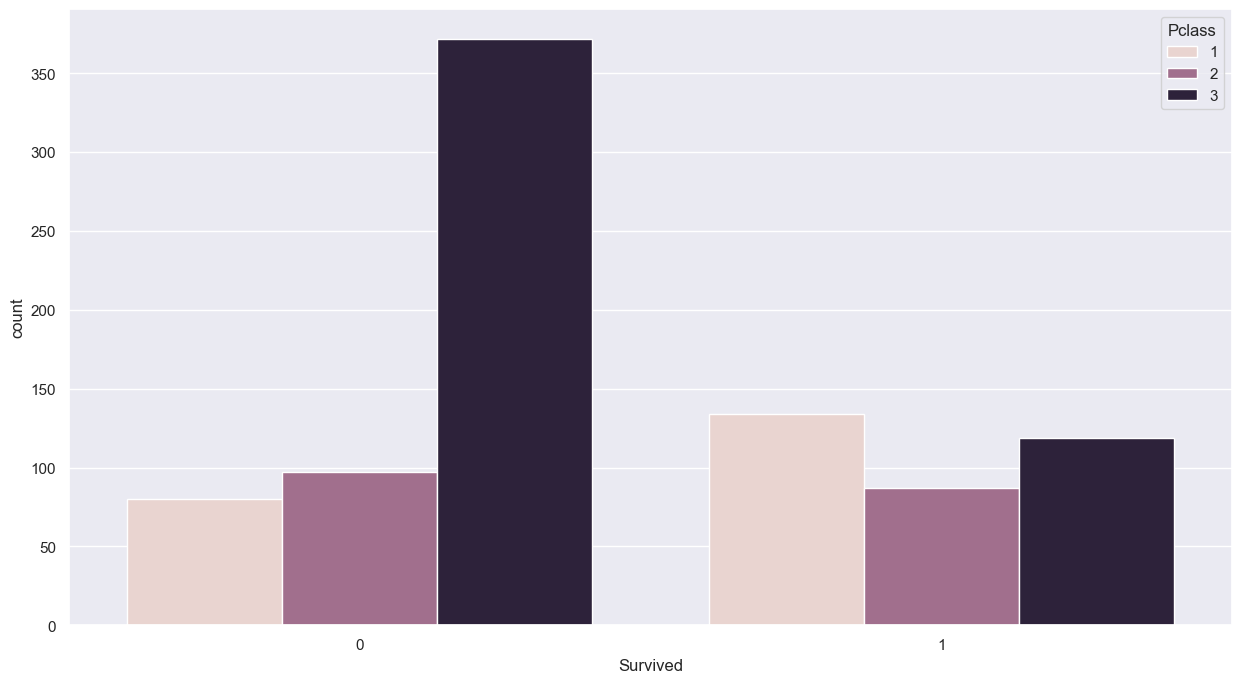

In [44]:
sb.countplot(x='Survived', data=data, hue='Pclass')


In [45]:
x = data.drop("Survived", axis=1)
y = data["Survived"]

# Train models

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3)


In [46]:
# Tree decision starts

model = DecisionTreeClassifier(max_depth=50)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy_score(y_test, predictions)


0.7652733118971061

Result for: 1: 0.7797427652733119
Result for: 2: 0.7797427652733119
Result for: 3: 0.7829581993569131
Result for: 4: 0.797427652733119
Result for: 5: 0.792604501607717
Result for: 6: 0.7942122186495176
Result for: 7: 0.7717041800643086
Result for: 8: 0.7636655948553055
Result for: 9: 0.7781350482315113
Result for: 10: 0.7717041800643086
Result for: 11: 0.7636655948553055
Result for: 12: 0.7797427652733119
Result for: 13: 0.7684887459807074
Result for: 14: 0.77491961414791


<Axes: >

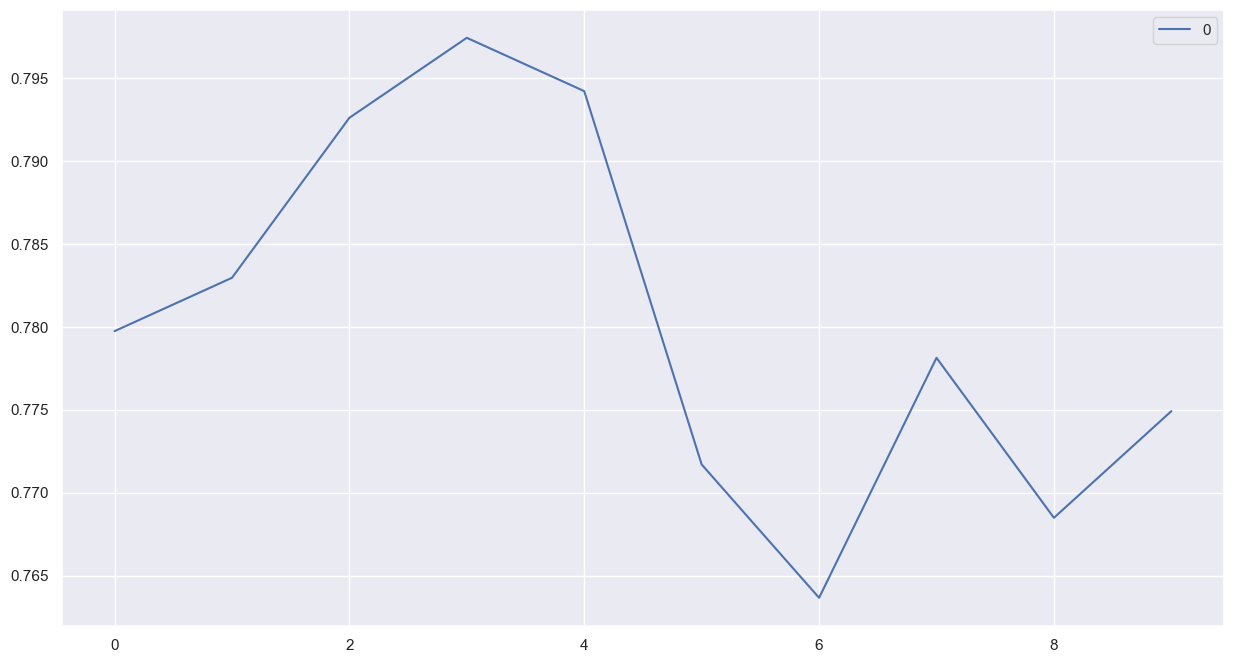

In [47]:
# Testing different max_depth values

accuracy_data = set()

for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    results = accuracy_score(y_test, predictions)
    accuracy_data.add(results)
    print(f"Result for: {i}: {results}")

# Showing the best results
sb.lineplot(data=accuracy_data)


In [48]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
results = accuracy_score(y_test, predictions)
print(results)

pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=["Pred: No", "Pred: Yes"],
    index=["Actual: No", "Actual: Yes"],
)


0.7829581993569131


,Pred: No,Pred: Yes
Actual: No,321,55
Actual: Yes,80,166


[Text(0.5, 0.875, 'male <= 0.5\n0.456\n267\n[173, 94]\nDied'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.399\n91\n[25, 66]\nSurvived'),
 Text(0.125, 0.375, 'Fare <= 26.875\n0.12\n47\n[3, 44]\nSurvived'),
 Text(0.0625, 0.125, '0.245\n21\n[3, 18]\nSurvived'),
 Text(0.1875, 0.125, '0.0\n26\n[0, 26]\nSurvived'),
 Text(0.375, 0.375, 'S <= 0.5\n0.5\n44\n[22, 22]\nDied'),
 Text(0.3125, 0.125, '0.32\n15\n[3, 12]\nSurvived'),
 Text(0.4375, 0.125, '0.452\n29\n[19, 10]\nDied'),
 Text(0.75, 0.625, 'Pclass <= 1.5\n0.268\n176\n[148, 28]\nDied'),
 Text(0.625, 0.375, 'Fare <= 30.598\n0.488\n38\n[22, 16]\nDied'),
 Text(0.5625, 0.125, '0.408\n14\n[4, 10]\nSurvived'),
 Text(0.6875, 0.125, '0.375\n24\n[18, 6]\nDied'),
 Text(0.875, 0.375, 'Age <= 10.0\n0.159\n138\n[126, 12]\nDied'),
 Text(0.8125, 0.125, '0.444\n3\n[1, 2]\nSurvived'),
 Text(0.9375, 0.125, '0.137\n135\n[125, 10]\nDied')]

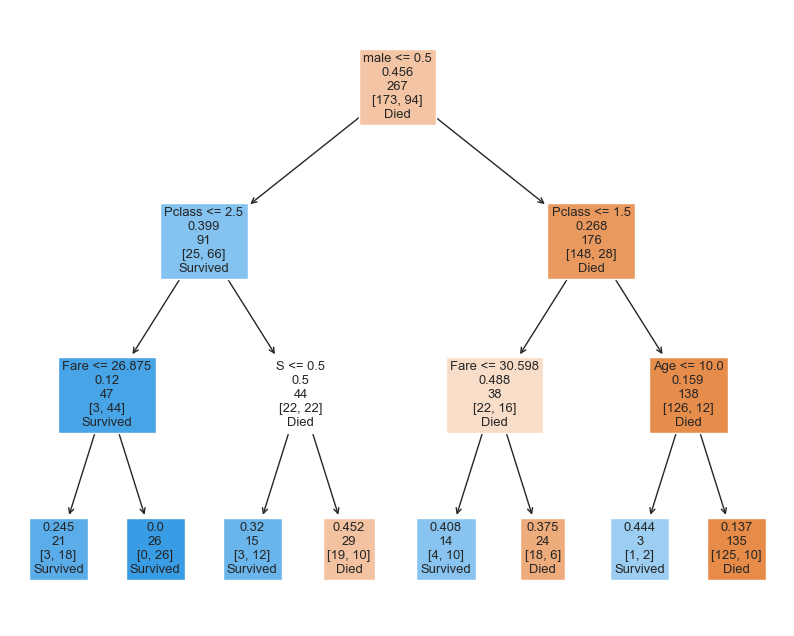

In [49]:
plt.figure(figsize=(10, 8))
plot_tree(
    model,
    feature_names=x_train.columns,
    class_names=["Died", "Survived"],
    filled=True,
    label="none",
)
